# Module - Preprocessing

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import numpy as np
from darts.datasets import EnergyDataset

In [3]:
import ontime as on

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/statsforecast/core.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


---
## Load data

In [4]:
ts = EnergyDataset().load()
ts = ts.astype(np.float32)

In [5]:
ts = ts.univariate_component(0)

<Axes: xlabel='time'>

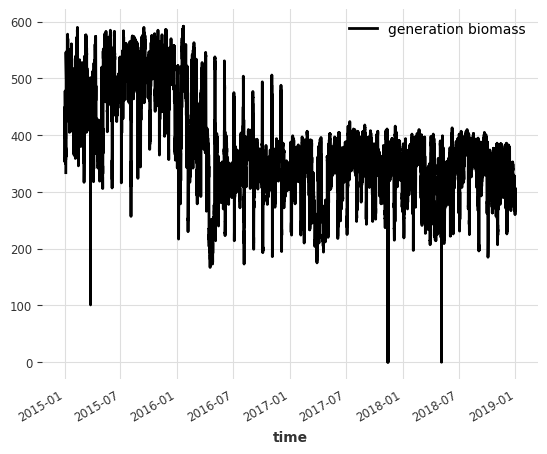

In [6]:
ts.plot()

In [7]:
from darts.dataprocessing.transformers import MissingValuesFiller

In [8]:
transformer = MissingValuesFiller()
ts = transformer.transform(ts)

---

## Tensorflow Preprocessing

In [9]:
from ontime.module import preprocessing

### Time series data

In [36]:
ts_t = preprocessing.common.normalize(ts)

train, test = preprocessing.common.train_test_split(ts_t, train_split=0.8)

train_list = preprocessing.common.split_by_length(train, 20, 20)
test_list = preprocessing.common.split_by_length(test, 20, 20)

X_train, y_train = preprocessing.common.split_inputs_from_targets(train_list, 10, 10)
X_test, y_test = preprocessing.common.split_inputs_from_targets(test_list, 10, 10)

X_train = preprocessing.common.timeseries_list_to_numpy(X_train)
y_train = preprocessing.common.timeseries_list_to_numpy(y_train)
X_test = preprocessing.common.timeseries_list_to_numpy(X_test)
y_test = preprocessing.common.timeseries_list_to_numpy(y_test)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1402, 10, 1)
(1402, 10, 1)
(350, 10, 1)
(350, 10, 1)


## Modelling

In [54]:
input_shape = X_train[0].shape
output_shape = y_train[0].shape

In [55]:
input_shape

(10, 1)

In [56]:
output_shape

(10, 1)

In [57]:
import tensorflow as tf

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_shape[0])
])

In [59]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

absl       WARNING At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


In [61]:
history = model.fit(
    X_train,
    y_train,
    epochs=10
)

Epoch 1/10
44/44 [==============================] - 0s 496us/step - loss: 0.0028 - mean_absolute_error: 0.0354
Epoch 2/10
44/44 [==============================] - 0s 418us/step - loss: 0.0027 - mean_absolute_error: 0.0351
Epoch 3/10
44/44 [==============================] - 0s 360us/step - loss: 0.0027 - mean_absolute_error: 0.0351
Epoch 4/10
44/44 [==============================] - 0s 372us/step - loss: 0.0027 - mean_absolute_error: 0.0346
Epoch 5/10
44/44 [==============================] - 0s 413us/step - loss: 0.0027 - mean_absolute_error: 0.0344
Epoch 6/10
44/44 [==============================] - 0s 367us/step - loss: 0.0027 - mean_absolute_error: 0.0341
Epoch 7/10
44/44 [==============================] - 0s 397us/step - loss: 0.0026 - mean_absolute_error: 0.0341
Epoch 8/10
44/44 [==============================] - 0s 405us/step - loss: 0.0026 - mean_absolute_error: 0.0338
Epoch 9/10
44/44 [==============================] - 0s 390us/step - loss: 0.0026 - mean_absolute_error: 0.0336
E

In [63]:
history

In [64]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 656us/step - loss: 0.0019 - mean_absolute_error: 0.0278


[0.0019231552723795176, 0.027800360694527626]

In [65]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [66]:
y_pred = model.predict(X_test)

11/11 [==============================] - 0s 589us/step


In [85]:
mape(y_pred, y_test.squeeze())

0.050735354

In [ ]:
test = y_test.flatten()
pred = y_pred.flatten()

<Axes: >

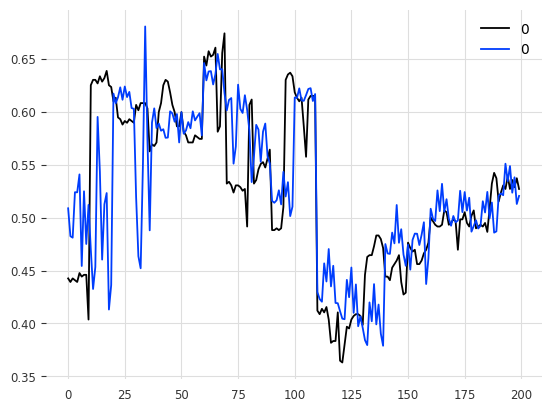

In [117]:
start = 600
width = 200

fig, ax = plt.subplots()
pd.DataFrame(test[start:start+width]).plot(ax=ax)
pd.DataFrame(pred[start:start+width]).plot(ax=ax)